# Walmart Business case - Confidence Interval and CLT (Central Limit Theorem)

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
# importing needed libraries

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import geom,norm,binom, t,ttest_1samp,ttest_ind,ttest_rel,chi2,chisquare,chi2_contingency

In [2]:
# Reading the dataset

df=pd.read_csv('walmart.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.shape

(550068, 10)

In [5]:
# Checking for Null values in the dataset.

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [8]:
# Checking what values are there in Occupation column
df['Occupation'].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

In [9]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

It can be observed that the 'Age' values are given in bins, so they can be converted to 'category' datatype and the same for 'Stay_In_Current_City_Years' as well. 

In [10]:
# Converting to suitable data types

df["User_ID"]=df["User_ID"].astype("object")
df['Age'] = df['Age'].astype('category')
df['Occupation'] = df['Occupation'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x == 0 else 'Married')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  object  
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  object  
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(1), object(4)
memory usage: 23.6+ MB


In [12]:
# Checking count, mean, standard deviation, different percentage quantiles etc. for 'Purchase' column.
# The same data for other series are not desirable as they are presented as either in form of bins or categories.

df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

It can be observed that mean(9263) of all the purchases are greater than the median(8047) of the same.
And the purchase values are varying starting from 12 going all the way to 23961.

In [13]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


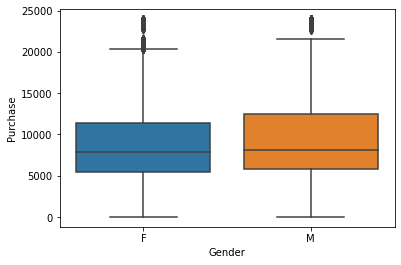

In [14]:
sns.boxplot(data=df,x='Gender',y='Purchase')
plt.show()

It can be observed that there are some outliers on the higher end of the purchase but none on the lower end, which can be a good sign for Walmart.

In [15]:
# Finding out the count, frequency etc. of unique customers, products and Occupation in given the dataset
df.describe(include='object')

,User_ID,Product_ID,Gender,Occupation
count,550068,550068,550068,550068
unique,5891,3631,2,21
top,1001680,P00265242,M,4
freq,1026,1880,414259,72308


It's observed that there are 5891 unique customers while '1001680' being the most frequent customer.
And there are 3631 unique products that are purchased by users, 'P00265242' being the most bought product.

In [16]:
# Finding out the count of unique product categories in the dataset
df['Product_Category'].nunique()

20

In [17]:
# Finding out the percentage of purchases made different age groups.
df['Age'].value_counts(normalize=True)*100

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64

It can be observed that people in the age group of 26-35yrs made the most transactions while people with in the ages of 18-45yrs made close to 80% of transactions.

In [18]:
# Finding out the percentage of all the purchases made by Male and Female.
df['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

More than 75% of the transactions are made by Male.

In [19]:
df['Product_Category'].value_counts(normalize=True)*100

Product_Category
5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: proportion, dtype: float64

Only 3 product categories make up to 75% of the sales.

# Univariate Analysis

### Analysis of User_ID and purchases over Gender

In [20]:
#Figuring out the percentage of unique customers for each gender.

df_user_gender = pd.DataFrame(df.groupby('Gender')['User_ID'].nunique()).reset_index()
df_user_gender['percentage']=df_user_gender['User_ID']/(df_user_gender['User_ID'].sum())*100
df_user_gender

,Gender,User_ID,percentage
0,F,1666,28.280428
1,M,4225,71.719572


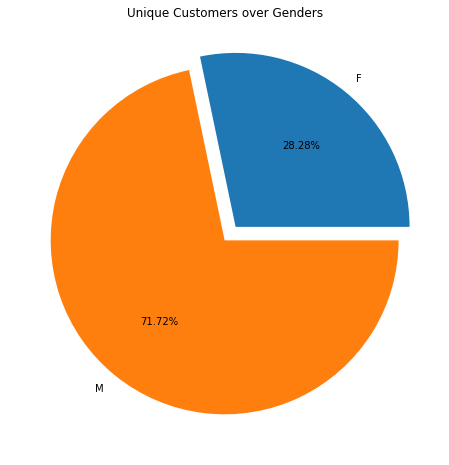

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(x=df_user_gender['percentage'],labels=df_user_gender['Gender'],explode=[0.1,0],autopct='%.2f%%')
plt.title('Unique Customers over Genders')
plt.show()

In [22]:
# Total transactions made by different genders

df.groupby(['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

In [23]:
#Average number of transactions made by each gender

print('Male : ', round((414259/4225),0))
print('Female : ', round((135809/1666),0))

Male :  98.0
Female :  82.0


In [24]:
#Finding the total purchases(Revenue) made by each gender.

df_revenue_gender = pd.DataFrame(df.groupby('Gender')['Purchase'].sum()).reset_index()
df_revenue_gender['percentage']=df_revenue_gender['Purchase']/(df_revenue_gender['Purchase'].sum())*100
df_revenue_gender

,Gender,Purchase,percentage
0,F,1186232642,23.278576
1,M,3909580100,76.721424


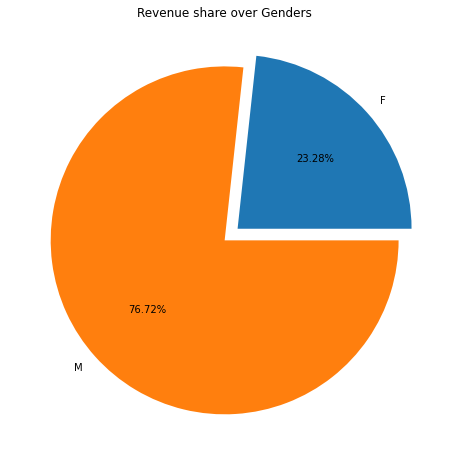

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(x=df_revenue_gender['percentage'],labels=df_revenue_gender['Gender'],explode=[0.1,0],autopct='%.2f%%')
plt.title('Revenue share over Genders')
plt.show()

In [26]:
# Finding out the average revenue by each gender

pd.DataFrame(df.groupby('Gender')['Purchase'].mean()).reset_index()

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


It can be observed that on an average men spend more money than women on each transaction.

### Analysis of User_ID and purchases over Marital status

In [27]:
#Figuring out the percentage of unique customers by their marital status.

df_user_marital_status = pd.DataFrame(df.groupby('Marital_Status')['User_ID'].nunique()).reset_index()
df_user_marital_status['percentage']=df_user_marital_status['User_ID']/(df_user_marital_status['User_ID'].sum())*100
df_user_marital_status

,Marital_Status,User_ID,percentage
0,Married,2474,41.996265
1,Single,3417,58.003735


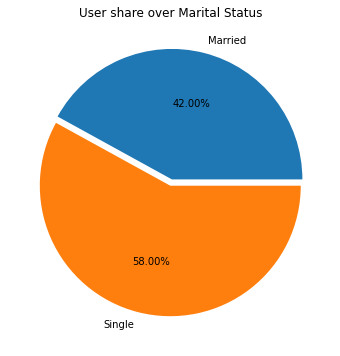

In [28]:
plt.figure(figsize=(6, 6))
plt.pie(x=df_user_marital_status['percentage'],labels=df_user_marital_status['Marital_Status'],explode=[0.05,0],autopct='%.2f%%')
plt.title('User share over Marital Status')
plt.show()

Its evident that close to 3 out of 5 of the users are unmarried.

In [29]:
# segmenting the users by their marital status and gender.

df_gender_marital_status = pd.DataFrame(df.groupby(['Marital_Status','Gender'])['User_ID'].nunique()).reset_index()
df_gender_marital_status['percentage']=df_gender_marital_status['User_ID']/(df_gender_marital_status['User_ID'].sum())*100
df_gender_marital_status

,Marital_Status,Gender,User_ID,percentage
0,Married,F,719,12.205059
1,Married,M,1755,29.791207
2,Single,F,947,16.075369
3,Single,M,2470,41.928365


In [30]:
#Figuring out the percentage of purchases by their marital status.

df_purchase_marital_status = pd.DataFrame(df.groupby('Marital_Status')['Purchase'].sum()).reset_index()
df_purchase_marital_status['percentage']=df_purchase_marital_status['Purchase']/(df_purchase_marital_status['Purchase'].sum())*100
df_purchase_marital_status

,Marital_Status,Purchase,percentage
0,Married,2086885295,40.952943
1,Single,3008927447,59.047057


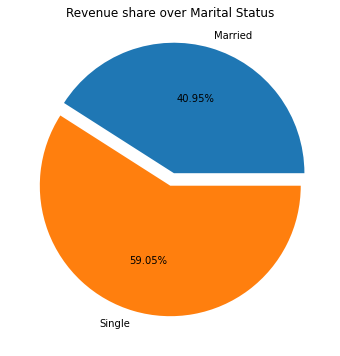

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(x=df_purchase_marital_status['percentage'],labels=df_purchase_marital_status['Marital_Status'],explode=[0.1,0],autopct='%.2f%%')
plt.title('Revenue share over Marital Status')
plt.show()

Close to 60% of the revenue is generated by the Single people.

In [32]:
# Finding out the mean puurchase value of each transaction by their marital status.

pd.DataFrame(df.groupby('Marital_Status')['Purchase'].mean()).reset_index()

,Marital_Status,Purchase
0,Married,9261.174574
1,Single,9265.907619


There is not much of a difference in average purchase values for married and single people.

In [33]:
# Finding the total average purchase value by each gender group.

df1=pd.DataFrame(df.groupby(['Marital_Status','User_ID'])['Purchase'].sum()).reset_index()
df1.groupby('Marital_Status')['Purchase'].mean().reset_index()

,Marital_Status,Purchase
0,Married,354249.753013
1,Single,510766.838737


### Analysis of Age groups 

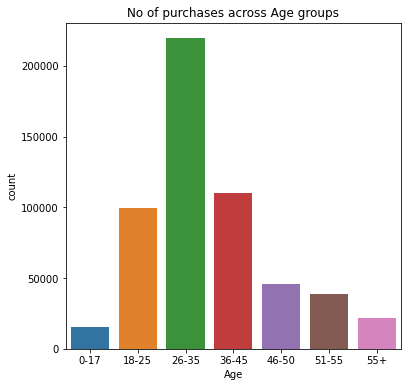

In [34]:
# Purchases made by each age group.

plt.figure(figsize=(6, 6))
sns.countplot(x=df['Age'])
plt.title('No of purchases across Age groups')
plt.show()

In [35]:
# Finding unique customers over different age groups.

df_user_age = pd.DataFrame(df.groupby('Age')['User_ID'].nunique()).reset_index()
df_user_age['percentage']=df_user_age['User_ID']/(df_user_age['User_ID'].sum())*100
df_user_age

,Age,User_ID,percentage
0,0-17,218,3.700560
1,18-25,1069,18.146325
2,26-35,2053,34.849771
3,36-45,1167,19.809879
4,46-50,531,9.013750
5,51-55,481,8.164997
6,55+,372,6.314717


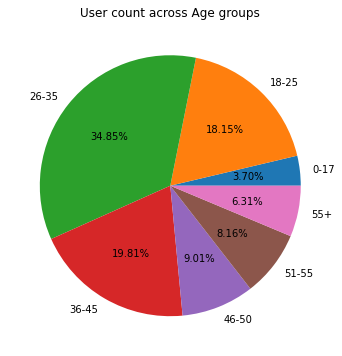

In [36]:
plt.figure(figsize=(6, 6))
plt.pie(x=df_user_age['percentage'],labels=df_user_age['Age'],autopct='%.2f%%')
plt.title('User count across Age groups')
plt.show()

Majority of the customers are in the ages between 18 - 45 yrs.

In [37]:
# Finding total purchases over different age groups.

df_purchase_age = pd.DataFrame(df.groupby('Age')['Purchase'].sum()).reset_index()
df_purchase_age['percentage']=df_purchase_age['Purchase']/(df_purchase_age['Purchase'].sum())*100
df_purchase_age

,Age,Purchase,percentage
0,0-17,134913183,2.647530
1,18-25,913848675,17.933325
2,26-35,2031770578,39.871374
3,36-45,1026569884,20.145361
4,46-50,420843403,8.258612
5,51-55,367099644,7.203947
6,55+,200767375,3.939850


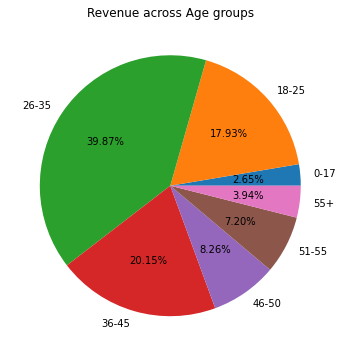

In [38]:
plt.figure(figsize=(6, 6))
plt.pie(x=df_purchase_age['percentage'],labels=df_purchase_age['Age'],autopct='%.2f%%')
plt.title('Revenue across Age groups')
plt.show()

In [39]:
# Finding the total average purchase value by each age group.

df2=pd.DataFrame(df.groupby(['Age','User_ID'])['Purchase'].sum()).reset_index()
df2.groupby('Age')['Purchase'].mean().reset_index()

,Age,Purchase
0,0-17,22901.575794
1,18-25,155126.239178
2,26-35,344894.004074
3,36-45,174260.717026
4,46-50,71438.364115
5,51-55,62315.335936
6,55+,34080.355627


Average purchase value for age group 26-35 yrs is the highest which is almost double the next highest group i.e., 36-45yrs.

### Analysis over city categories

In [40]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [41]:
# Finding unique customers over different City categories.

df_user_city = pd.DataFrame(df.groupby('City_Category')['User_ID'].nunique()).reset_index()
df_user_city['percentage']=df_user_city['User_ID']/(df_user_city['User_ID'].sum())*100
df_user_city

,City_Category,User_ID,percentage
0,A,1045,17.738924
1,B,1707,28.976405
2,C,3139,53.284672


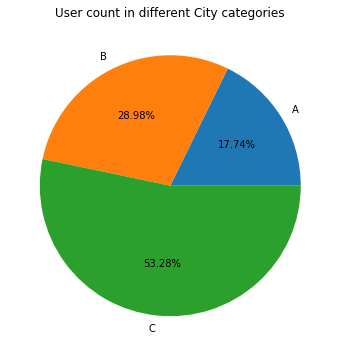

In [42]:
plt.figure(figsize=(6, 6))
plt.pie(x=df_user_city['percentage'],labels=df_user_city['City_Category'],autopct='%.2f%%')
plt.title('User count in different City categories')
plt.show()

More than half the customers are from 1 city category.

In [43]:
# Finding total purchases from different City categories.

df_purchase_city = pd.DataFrame(df.groupby('City_Category')['Purchase'].sum()).reset_index()
df_purchase_city['percentage']=df_purchase_city['Purchase']/(df_purchase_city['Purchase'].sum())*100
df_purchase_city

,City_Category,Purchase,percentage
0,A,1316471661,25.834381
1,B,2115533605,41.515136
2,C,1663807476,32.650483


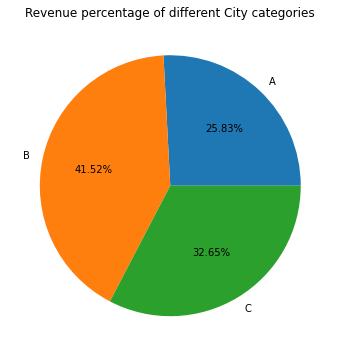

In [44]:
plt.figure(figsize=(6, 6))
plt.pie(x=df_purchase_city['percentage'],labels=df_user_city['City_Category'],autopct='%.2f%%')
plt.title('Revenue percentage of different City categories')
plt.show()

Even though the user share is more in city category 'C', its revenue is falling behind. And City category 'B' is performing well as its revenue share is much higher when compared to its user share.

In [45]:
# Finding the average total purchase value in each City category.

df3=pd.DataFrame(df.groupby(['City_Category','User_ID'])['Purchase'].sum()).reset_index()
df3.groupby('City_Category')['Purchase'].mean().reset_index()

,City_Category,Purchase
0,A,223471.679002
1,B,359112.817009
2,C,282432.095739


In [46]:
# segmenting the users by their marital status and cities.

df4 = pd.DataFrame(df.groupby(['Marital_Status','City_Category'])['User_ID'].nunique()).reset_index()
df4['percentage']=df4['User_ID']/(df4['User_ID'].sum())*100
df4

,Marital_Status,City_Category,User_ID,percentage
0,Married,A,393,6.671193
1,Married,B,703,11.933458
2,Married,C,1378,23.391614
3,Single,A,652,11.067730
4,Single,B,1004,17.042947
5,Single,C,1761,29.893057


### Analysis over Product categories 

In [47]:
df['Product_Category'].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [48]:
df['Product_Category'].nunique()

20

In [49]:
# Finding the average total purchase value in each Product category.

df5=pd.DataFrame(df.groupby('Product_Category')['Purchase'].sum())
df5['percentage']=round(df5['Purchase']/(df5['Purchase'].sum())*100,2)
df5=df5.sort_values(by='percentage', ascending=False).reset_index()
df5

,Product_Category,Purchase,percentage
0,1,1910013754,37.48
1,5,941835229,18.48
2,8,854318799,16.77
3,6,324150302,6.36
4,2,268516186,5.27
5,3,204084713,4.00
6,16,145120612,2.85
7,11,113791115,2.23
8,10,100837301,1.98
9,15,92969042,1.82


The product categories 1,5,8,6 and 2 contribute close to 85% of the revenue.

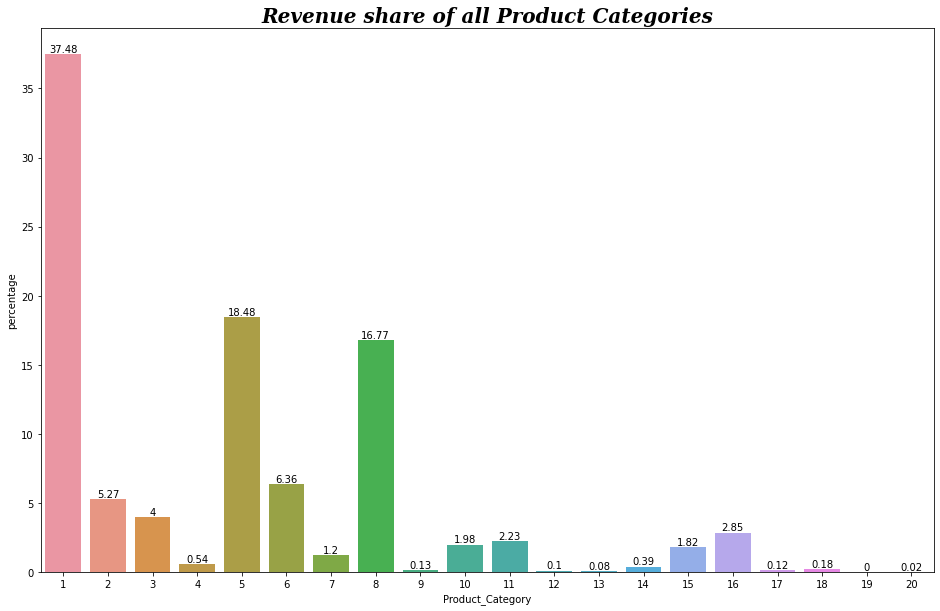

In [50]:
plt.figure(figsize=(16, 10))
ax=sns.barplot(x=df5['Product_Category'],y=df5['percentage'])
ax.bar_label(ax.containers[0])
plt.title('Revenue share of all Product Categories', fontsize = 20,fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.show()

### Analysis over Occupation 

In [51]:
#Figuring out the percentage of unique customers by their occupation.

df_user_occupation = pd.DataFrame(df.groupby('Occupation')['User_ID'].nunique()).reset_index()
df_user_occupation['percentage']=round(df_user_occupation['User_ID']/(df_user_occupation['User_ID'].sum())*100,2)
df_user_occupation=df_user_occupation.sort_values(by='percentage', ascending=False)
df_user_occupation

,Occupation,User_ID,percentage
4,4,740,12.56
0,0,688,11.68
7,7,669,11.36
1,1,517,8.78
17,17,491,8.33
12,12,376,6.38
14,14,294,4.99
20,20,273,4.63
2,2,256,4.35
16,16,235,3.99


More than 50% of the users has 4,0,7,1 and 17.

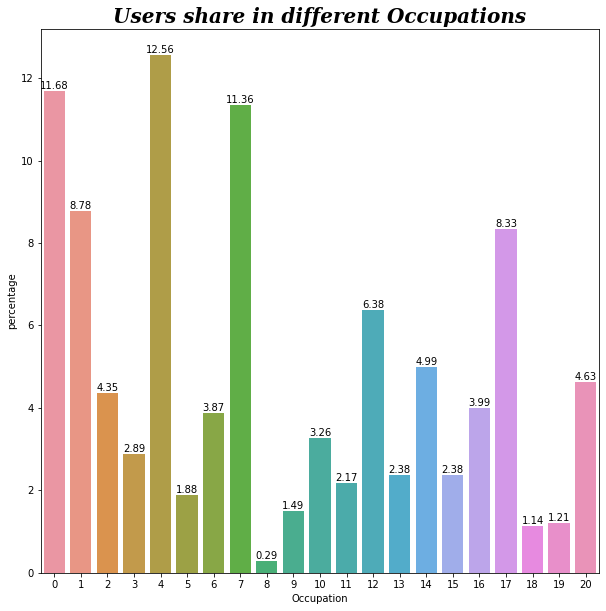

In [52]:
plt.figure(figsize=(10, 10))
ax=sns.barplot(x=df_user_occupation['Occupation'],y=df_user_occupation['percentage'])
ax.bar_label(ax.containers[0])
plt.title('Users share in different Occupations', fontsize = 20,fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.show()

In [53]:
df6=pd.DataFrame(df.groupby('Occupation')['Purchase'].sum())
df6['percentage']=round(df6['Purchase']/(df6['Purchase'].sum())*100,2)
df6=df6.sort_values(by='percentage', ascending=False).reset_index()
df6

,Occupation,Purchase,percentage
0,4,666244484,13.07
1,0,635406958,12.47
2,7,557371587,10.94
3,1,424614144,8.33
4,17,393281453,7.72
5,12,305449446,5.99
6,20,296570442,5.82
7,14,259454692,5.09
8,16,238346955,4.68
9,2,238028583,4.67


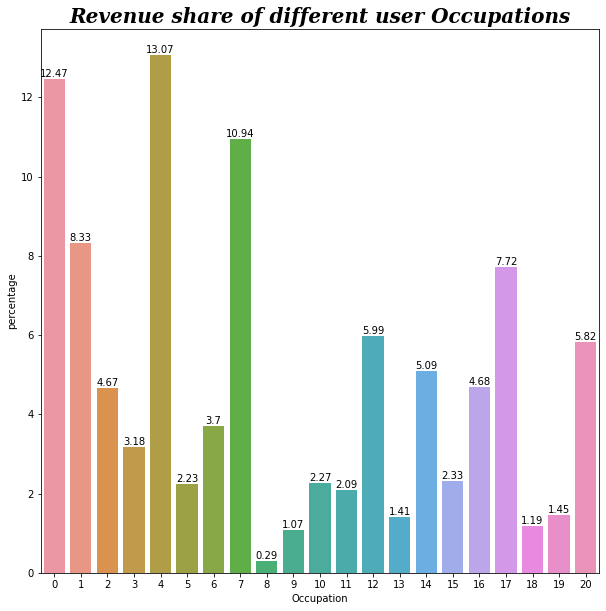

In [54]:
plt.figure(figsize=(10, 10))
ax=sns.barplot(x=df6['Occupation'],y=df6['percentage'])
ax.bar_label(ax.containers[0])
plt.title('Revenue share of different user Occupations', fontsize = 20,fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.show()

## Confidence Interval calculation for male and female separately

In [66]:
# Creating a dataframe with all the purchases made by male customers.

df_male=df[df['Gender']=='M']
df_male.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Single,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686


In [69]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 4000.

male_mean_purchases=[]
for sample_size in range(50, 4000):
    sample_mean = df_male['Purchase'].sample(sample_size).mean()
    male_mean_purchases.append(sample_mean)

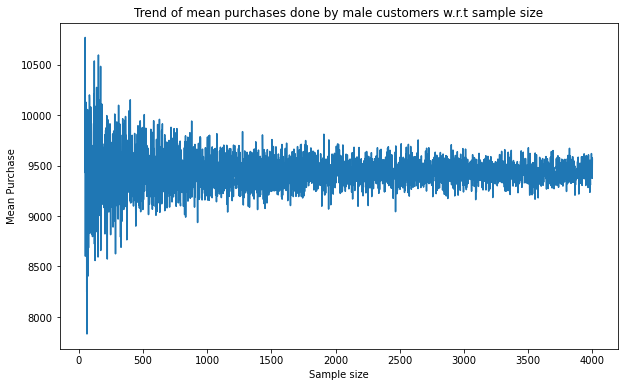

In [76]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(50,4000),male_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Trend of mean purchases done by male customers w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [55]:
# Creating a sample for male's purchases

sample_size=3000
iterations=1000
male=df[df["Gender"] == "M"]
male_sample_df = [male.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

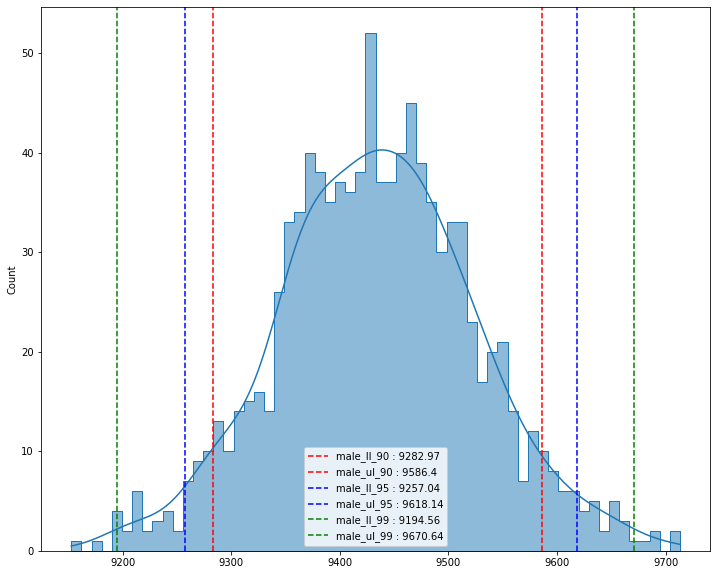

In [56]:
plt.figure(figsize=(12, 10))
sns.histplot(male_sample_df,kde=True,fill=True,bins=60,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
male_90CI_lower_limit= np.percentile(male_sample_df,5)
male_90CI_upper_limit=np.percentile(male_sample_df,95)
plt.axvline(male_90CI_lower_limit, color='red', linestyle='--', label=f'male_ll_90 : {round(male_90CI_lower_limit, 2)}')
plt.axvline(male_90CI_upper_limit, color='red', linestyle='--', label=f'male_ul_90 : {round(male_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
male_95CI_lower_limit= np.percentile(male_sample_df,2.5)
male_95CI_upper_limit=np.percentile(male_sample_df,97.5)
plt.axvline(male_95CI_lower_limit, color='blue', linestyle='--', label=f'male_ll_95 : {round(male_95CI_lower_limit, 2)}')
plt.axvline(male_95CI_upper_limit, color='blue', linestyle='--', label=f'male_ul_95 : {round(male_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
male_99CI_lower_limit= np.percentile(male_sample_df,0.5)
male_99CI_upper_limit=np.percentile(male_sample_df,99.5)
plt.axvline(male_99CI_lower_limit, color='green', linestyle='--', label=f'male_ll_99 : {round(male_99CI_lower_limit, 2)}')
plt.axvline(male_99CI_upper_limit, color='green', linestyle='--', label=f'male_ul_99 : {round(male_99CI_upper_limit, 2)}')

plt.legend()
plt.show()

In [77]:
# Creating a dataframe with all the purchases made by female customers.

df_female=df[df['Gender']=='F']
df_female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
14,1000006,P00231342,F,51-55,9,A,1,Single,5,5378


In [78]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 4000.

female_mean_purchases=[]
for sample_size in range(50, 4000):
    sample_mean = df_female['Purchase'].sample(sample_size).mean()
    female_mean_purchases.append(sample_mean)

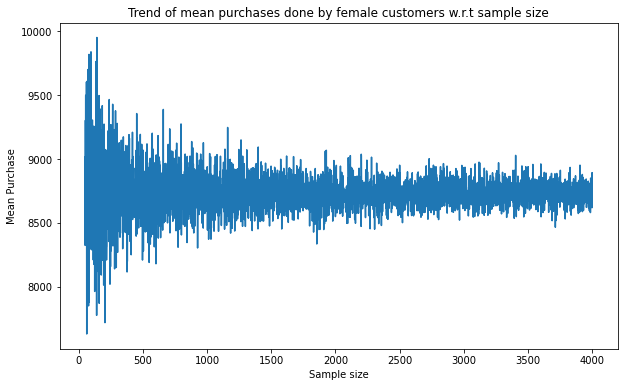

In [79]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(50,4000),female_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Trend of mean purchases done by female customers w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

We can observe that variance in means of the purchases made by male and female customers are reducing when increasing sample sizes.

In [57]:
# Creating a sample for female's purchases

sample_size=3000
iterations=1000
female=df[df["Gender"] == "F"]
female_sample_df = [female.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

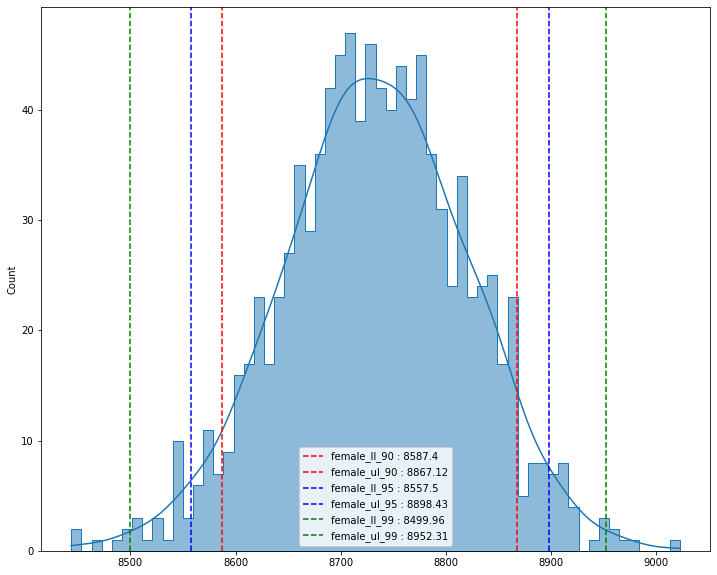

In [58]:
plt.figure(figsize=(12, 10))
sns.histplot(female_sample_df,kde=True,fill=True,bins=60,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
female_90CI_lower_limit= np.percentile(female_sample_df,5)
female_90CI_upper_limit=np.percentile(female_sample_df,95)
plt.axvline(female_90CI_lower_limit, color='red', linestyle='--', label=f'female_ll_90 : {round(female_90CI_lower_limit, 2)}')
plt.axvline(female_90CI_upper_limit, color='red', linestyle='--', label=f'female_ul_90 : {round(female_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
female_95CI_lower_limit= np.percentile(female_sample_df,2.5)
female_95CI_upper_limit=np.percentile(female_sample_df,97.5)
plt.axvline(female_95CI_lower_limit, color='blue', linestyle='--', label=f'female_ll_95 : {round(female_95CI_lower_limit, 2)}')
plt.axvline(female_95CI_upper_limit, color='blue', linestyle='--', label=f'female_ul_95 : {round(female_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
female_99CI_lower_limit= np.percentile(female_sample_df,0.5)
female_99CI_upper_limit=np.percentile(female_sample_df,99.5)
plt.axvline(female_99CI_lower_limit, color='green', linestyle='--', label=f'female_ll_99 : {round(female_99CI_lower_limit, 2)}')
plt.axvline(female_99CI_upper_limit, color='green', linestyle='--', label=f'female_ul_99 : {round(female_99CI_upper_limit, 2)}')

plt.legend()
plt.show()

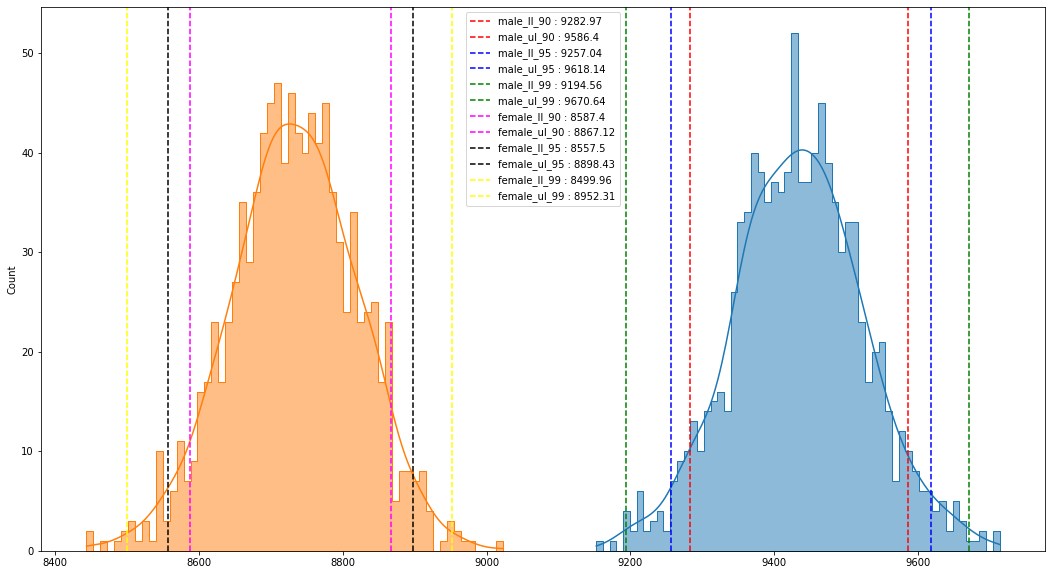

In [59]:
plt.figure(figsize=(18, 10))
sns.histplot(male_sample_df,kde=True,fill=True,bins=60,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
male_90CI_lower_limit= np.percentile(male_sample_df,5)
male_90CI_upper_limit=np.percentile(male_sample_df,95)
plt.axvline(male_90CI_lower_limit, color='red', linestyle='--', label=f'male_ll_90 : {round(male_90CI_lower_limit, 2)}')
plt.axvline(male_90CI_upper_limit, color='red', linestyle='--', label=f'male_ul_90 : {round(male_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
male_95CI_lower_limit= np.percentile(male_sample_df,2.5)
male_95CI_upper_limit=np.percentile(male_sample_df,97.5)
plt.axvline(male_95CI_lower_limit, color='blue', linestyle='--', label=f'male_ll_95 : {round(male_95CI_lower_limit, 2)}')
plt.axvline(male_95CI_upper_limit, color='blue', linestyle='--', label=f'male_ul_95 : {round(male_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
male_99CI_lower_limit= np.percentile(male_sample_df,0.5)
male_99CI_upper_limit=np.percentile(male_sample_df,99.5)
plt.axvline(male_99CI_lower_limit, color='green', linestyle='--', label=f'male_ll_99 : {round(male_99CI_lower_limit, 2)}')
plt.axvline(male_99CI_upper_limit, color='green', linestyle='--', label=f'male_ul_99 : {round(male_99CI_upper_limit, 2)}')

sns.histplot(female_sample_df,kde=True,fill=True,bins=60,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
female_90CI_lower_limit= np.percentile(female_sample_df,5)
female_90CI_upper_limit=np.percentile(female_sample_df,95)
plt.axvline(female_90CI_lower_limit, color='magenta', linestyle='--', label=f'female_ll_90 : {round(female_90CI_lower_limit, 2)}')
plt.axvline(female_90CI_upper_limit, color='magenta', linestyle='--', label=f'female_ul_90 : {round(female_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
female_95CI_lower_limit= np.percentile(female_sample_df,2.5)
female_95CI_upper_limit=np.percentile(female_sample_df,97.5)
plt.axvline(female_95CI_lower_limit, color='black', linestyle='--', label=f'female_ll_95 : {round(female_95CI_lower_limit, 2)}')
plt.axvline(female_95CI_upper_limit, color='black', linestyle='--', label=f'female_ul_95 : {round(female_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
female_99CI_lower_limit= np.percentile(female_sample_df,0.5)
female_99CI_upper_limit=np.percentile(female_sample_df,99.5)
plt.axvline(female_99CI_lower_limit, color='yellow', linestyle='--', label=f'female_ll_99 : {round(female_99CI_lower_limit, 2)}')
plt.axvline(female_99CI_upper_limit, color='yellow', linestyle='--', label=f'female_ul_99 : {round(female_99CI_upper_limit, 2)}')

plt.legend()
plt.show()

The male and female sample's distributions seems to be closer to Normal distribution.

It can be clearly observed that the confidence intervals for male and female spending is not overlapping. And the Male sample distribution is towards the right of femal sample.
So, we can say that with 99% confidence Male are spending more than Female.

There could be many reasons for this in general observations such as income disparity between male and female customers, different product preferrences or even maybe a lapse in targeted marketing for females.

## Confidence Interval calculation for single and married separately

In [80]:
# Creating a dataframe with all the purchases made by single customers.

df_single=df[df['Marital_Status']=='Single']
df_single.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [81]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 4000.

single_mean_purchases=[]
for sample_size in range(50, 4000):
    sample_mean = df_single['Purchase'].sample(sample_size).mean()
    single_mean_purchases.append(sample_mean)

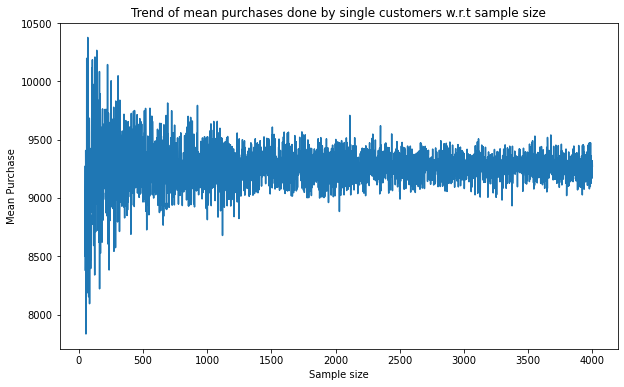

In [82]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(50,4000),single_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Trend of mean purchases done by single customers w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [60]:
# Creating a sample with single people purchase data

sample_size=3000
iterations=1000
single=df[df["Marital_Status"] == "Single"]
singles_sample_df = [single.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

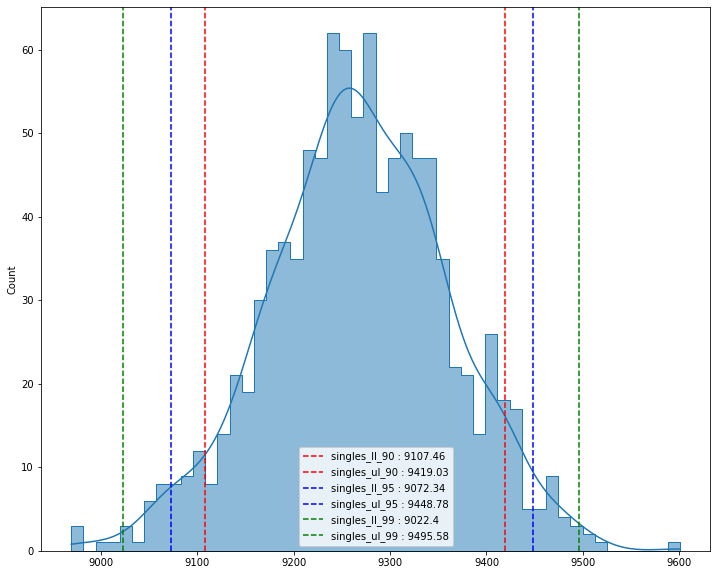

In [61]:
plt.figure(figsize=(12, 10))
sns.histplot(singles_sample_df,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
single_90CI_lower_limit= np.percentile(singles_sample_df,5)
single_90CI_upper_limit=np.percentile(singles_sample_df,95)
plt.axvline(single_90CI_lower_limit, color='red', linestyle='--', label=f'singles_ll_90 : {round(single_90CI_lower_limit, 2)}')
plt.axvline(single_90CI_upper_limit, color='red', linestyle='--', label=f'singles_ul_90 : {round(single_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
single_95CI_lower_limit= np.percentile(singles_sample_df,2.5)
single_95CI_upper_limit=np.percentile(singles_sample_df,97.5)
plt.axvline(single_95CI_lower_limit, color='blue', linestyle='--', label=f'singles_ll_95 : {round(single_95CI_lower_limit, 2)}')
plt.axvline(single_95CI_upper_limit, color='blue', linestyle='--', label=f'singles_ul_95 : {round(single_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
single_99CI_lower_limit= np.percentile(singles_sample_df,0.5)
single_99CI_upper_limit=np.percentile(singles_sample_df,99.5)
plt.axvline(single_99CI_lower_limit, color='green', linestyle='--', label=f'singles_ll_99 : {round(single_99CI_lower_limit, 2)}')
plt.axvline(single_99CI_upper_limit, color='green', linestyle='--', label=f'singles_ul_99 : {round(single_99CI_upper_limit, 2)}')

plt.legend()
plt.show()

In [83]:
# Creating a dataframe with all the purchases made by married customers.

df_married=df[df['Marital_Status']=='Married']
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686
9,1000005,P00274942,M,26-35,20,A,1,Married,8,7871
10,1000005,P00251242,M,26-35,20,A,1,Married,5,5254


In [84]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 4000.

married_mean_purchases=[]
for sample_size in range(50, 4000):
    sample_mean = df_married['Purchase'].sample(sample_size).mean()
    married_mean_purchases.append(sample_mean)

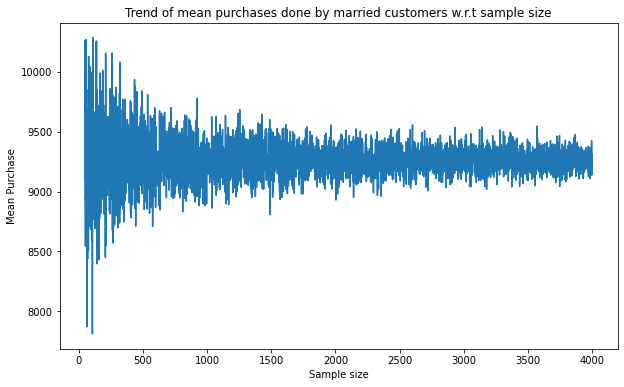

In [86]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(50,4000),married_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Trend of mean purchases done by married customers w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [62]:
# Creating a sample with married people purchase data

sample_size=3000
iterations=1000
married=df[df["Marital_Status"] == "Married"]
married_sample_df = [married.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

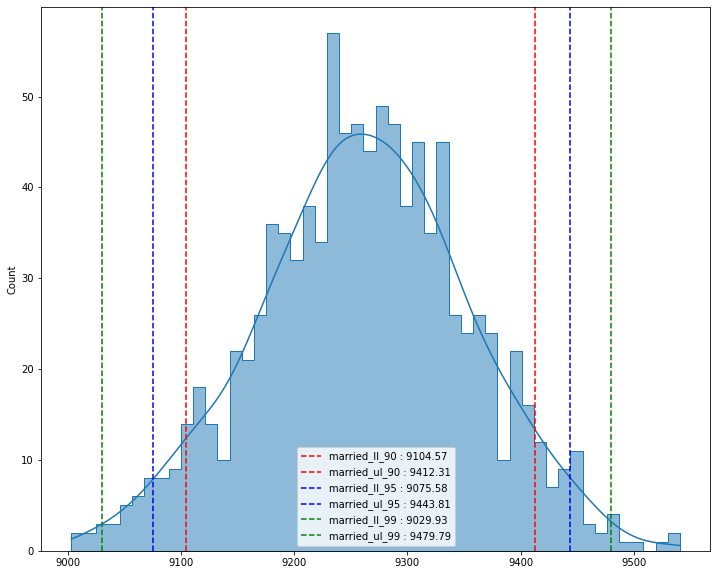

In [63]:
plt.figure(figsize=(12, 10))
sns.histplot(married_sample_df,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
married_90CI_lower_limit= np.percentile(married_sample_df,5)
married_90CI_upper_limit=np.percentile(married_sample_df,95)
plt.axvline(married_90CI_lower_limit, color='red', linestyle='--', label=f'married_ll_90 : {round(married_90CI_lower_limit, 2)}')
plt.axvline(married_90CI_upper_limit, color='red', linestyle='--', label=f'married_ul_90 : {round(married_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
married_95CI_lower_limit= np.percentile(married_sample_df,2.5)
married_95CI_upper_limit=np.percentile(married_sample_df,97.5)
plt.axvline(married_95CI_lower_limit, color='blue', linestyle='--', label=f'married_ll_95 : {round(married_95CI_lower_limit, 2)}')
plt.axvline(married_95CI_upper_limit, color='blue', linestyle='--', label=f'married_ul_95 : {round(married_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
married_99CI_lower_limit= np.percentile(married_sample_df,0.5)
married_99CI_upper_limit=np.percentile(married_sample_df,99.5)
plt.axvline(married_99CI_lower_limit, color='green', linestyle='--', label=f'married_ll_99 : {round(married_99CI_lower_limit, 2)}')
plt.axvline(married_99CI_upper_limit, color='green', linestyle='--', label=f'married_ul_99 : {round(married_99CI_upper_limit, 2)}')

plt.legend()
plt.show()

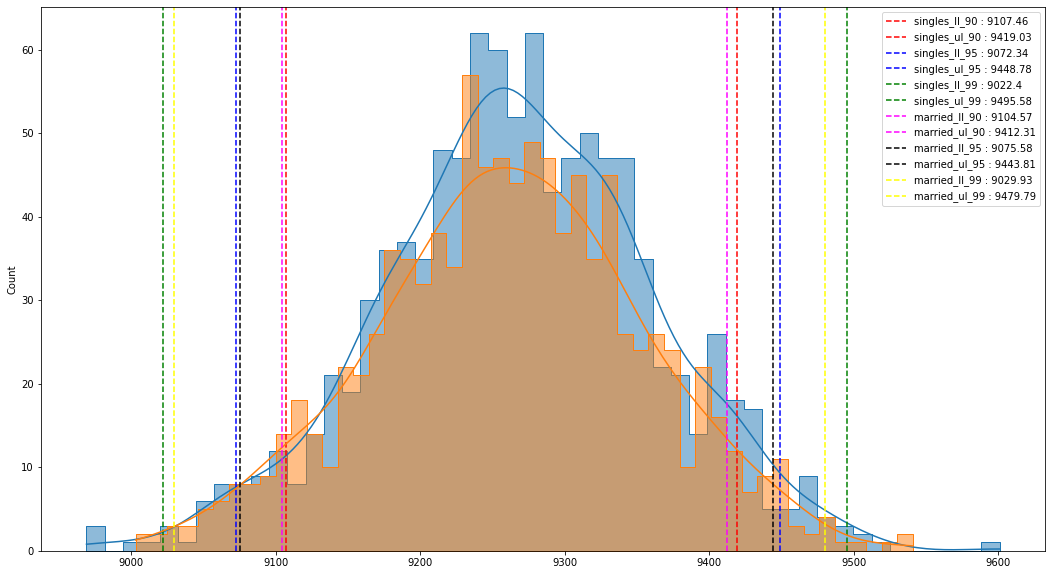

In [64]:
plt.figure(figsize=(18, 10))
sns.histplot(singles_sample_df,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
single_90CI_lower_limit= np.percentile(singles_sample_df,5)
single_90CI_upper_limit=np.percentile(singles_sample_df,95)
plt.axvline(single_90CI_lower_limit, color='red', linestyle='--', label=f'singles_ll_90 : {round(single_90CI_lower_limit, 2)}')
plt.axvline(single_90CI_upper_limit, color='red', linestyle='--', label=f'singles_ul_90 : {round(single_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
single_95CI_lower_limit= np.percentile(singles_sample_df,2.5)
single_95CI_upper_limit=np.percentile(singles_sample_df,97.5)
plt.axvline(single_95CI_lower_limit, color='blue', linestyle='--', label=f'singles_ll_95 : {round(single_95CI_lower_limit, 2)}')
plt.axvline(single_95CI_upper_limit, color='blue', linestyle='--', label=f'singles_ul_95 : {round(single_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
single_99CI_lower_limit= np.percentile(singles_sample_df,0.5)
single_99CI_upper_limit=np.percentile(singles_sample_df,99.5)
plt.axvline(single_99CI_lower_limit, color='green', linestyle='--', label=f'singles_ll_99 : {round(single_99CI_lower_limit, 2)}')
plt.axvline(single_99CI_upper_limit, color='green', linestyle='--', label=f'singles_ul_99 : {round(single_99CI_upper_limit, 2)}')

sns.histplot(married_sample_df,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
married_90CI_lower_limit= np.percentile(married_sample_df,5)
married_90CI_upper_limit=np.percentile(married_sample_df,95)
plt.axvline(married_90CI_lower_limit, color='magenta', linestyle='--', label=f'married_ll_90 : {round(married_90CI_lower_limit, 2)}')
plt.axvline(married_90CI_upper_limit, color='magenta', linestyle='--', label=f'married_ul_90 : {round(married_90CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
married_95CI_lower_limit= np.percentile(married_sample_df,2.5)
married_95CI_upper_limit=np.percentile(married_sample_df,97.5)
plt.axvline(married_95CI_lower_limit, color='black', linestyle='--', label=f'married_ll_95 : {round(married_95CI_lower_limit, 2)}')
plt.axvline(married_95CI_upper_limit, color='black', linestyle='--', label=f'married_ul_95 : {round(married_95CI_upper_limit, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
married_99CI_lower_limit= np.percentile(married_sample_df,0.5)
married_99CI_upper_limit=np.percentile(married_sample_df,99.5)
plt.axvline(married_99CI_lower_limit, color='yellow', linestyle='--', label=f'married_ll_99 : {round(married_99CI_lower_limit, 2)}')
plt.axvline(married_99CI_upper_limit, color='yellow', linestyle='--', label=f'married_ul_99 : {round(married_99CI_upper_limit, 2)}')

plt.legend()
plt.show()

The distributions of single and married people seems to be closer to Normal distribution.

From the above plots we can observe that the single and married people data is very similar to each other with very similar ranges.

By observing the upper and lower limits of various confidence intervals we can deduce that there is no difference between the spending of single and married people in the given dataset.
So we can say that the relationship status doesnt strongly influence the spendings.

## Confidence Interval calculation for different age groups separately

In [88]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

There are 7 different age groups in our dataset.

In [91]:
# Creating 7 different dataframes with data from only one age group each.

df_0_to_17=df.loc[df['Age']=='0-17']
df_18_to_25=df.loc[df['Age']=='18-25']
df_26_to_35=df.loc[df['Age']=='26-35']
df_36_to_45=df.loc[df['Age']=='36-45']
df_46_to_50=df.loc[df['Age']=='46-50']
df_51_to_55=df.loc[df['Age']=='51-55']
df_above_55=df.loc[df['Age']=='55+']

In [99]:
df_0_to_17

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
85,1000019,P00112542,M,0-17,10,A,3,Single,1,7746
...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,Single,20,256
550012,1005953,P00370853,M,0-17,10,B,0,Single,19,26
550024,1005973,P00370293,M,0-17,10,C,4+,Single,19,12
550035,1005989,P00370853,F,0-17,10,C,3,Single,19,61


In [103]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 1000 of people in 0-17 yrs age group.

age_0_to_17_mean_purchases=[]
for sample_size in range(50, 1000):
    sample_mean = df_0_to_17['Purchase'].sample(sample_size).mean()
    age_0_to_17_mean_purchases.append(sample_mean)

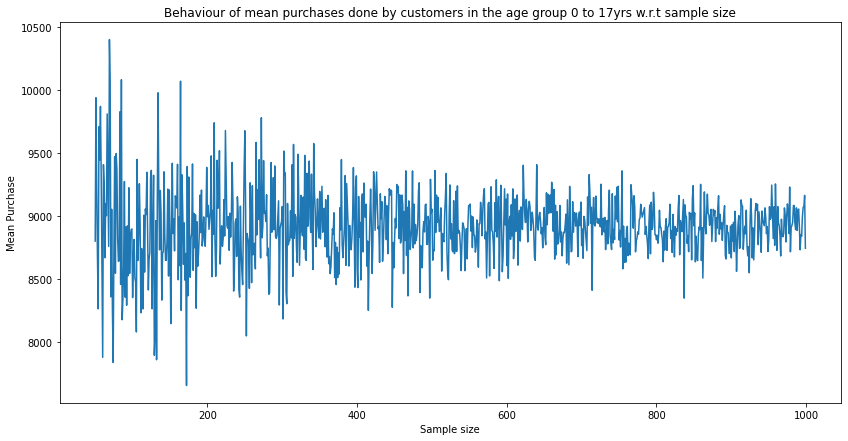

In [108]:
plt.figure(figsize=(14,7))
plt.plot(np.arange(50,1000),age_0_to_17_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Behaviour of mean purchases done by customers in the age group 0 to 17yrs w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [109]:
# Creating a sample of purchase data of people in the age group of 0 to 17 yrs.

sample_size=1000
iterations=1000
df_0_to_17_sample = [df_0_to_17.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

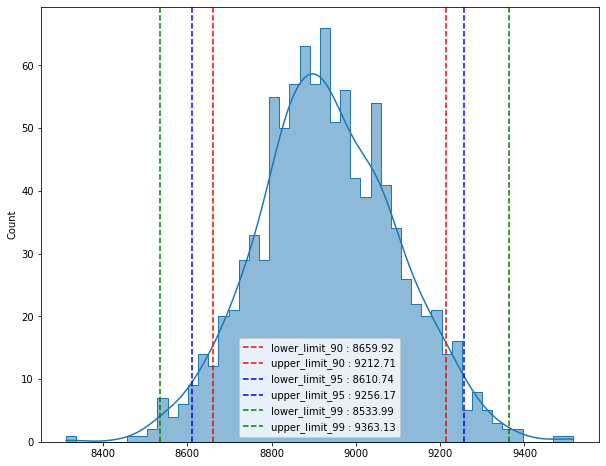

In [115]:
plt.figure(figsize=(10, 8))
sns.histplot(df_0_to_17_sample,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
lower_limit_90CI= np.percentile(df_0_to_17_sample,5)
upper_limit_90CI=np.percentile(df_0_to_17_sample,95)
plt.axvline(lower_limit_90CI, color='red', linestyle='--', label=f'lower_limit_90 : {round(lower_limit_90CI, 2)}')
plt.axvline(upper_limit_90CI, color='red', linestyle='--', label=f'upper_limit_90 : {round(upper_limit_90CI, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
lower_limit_95CI= np.percentile(df_0_to_17_sample,2.5)
upper_limit_95CI=np.percentile(df_0_to_17_sample,97.5)
plt.axvline(lower_limit_95CI, color='blue', linestyle='--', label=f'lower_limit_95 : {round(lower_limit_95CI, 2)}')
plt.axvline(upper_limit_95CI, color='blue', linestyle='--', label=f'upper_limit_95 : {round(upper_limit_95CI, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
lower_limit_99CI= np.percentile(df_0_to_17_sample,0.5)
upper_limit_99CI=np.percentile(df_0_to_17_sample,99.5)
plt.axvline(lower_limit_99CI, color='green', linestyle='--', label=f'lower_limit_99 : {round(lower_limit_99CI, 2)}')
plt.axvline(upper_limit_99CI, color='green', linestyle='--', label=f'upper_limit_99 : {round(upper_limit_99CI, 2)}')

plt.legend()
plt.show()

In [116]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 1000 of people in 18-25 yrs age group.

age_18_to_25_mean_purchases=[]
for sample_size in range(50, 1000):
    sample_mean = df_18_to_25['Purchase'].sample(sample_size).mean()
    age_18_to_25_mean_purchases.append(sample_mean)

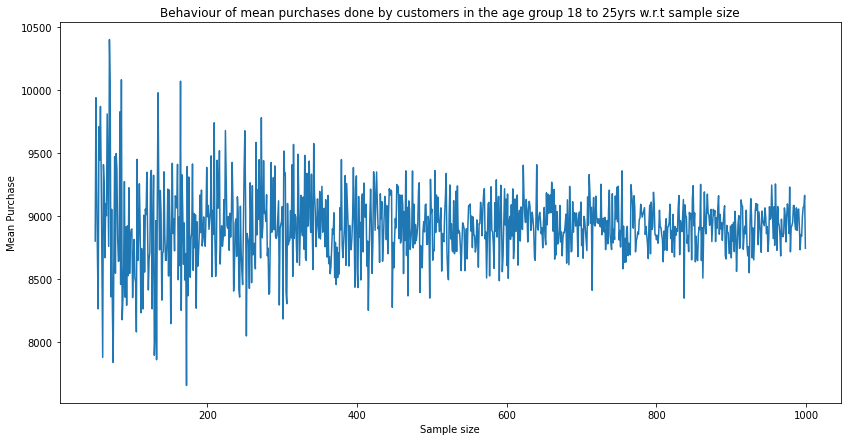

In [117]:
plt.figure(figsize=(14,7))
plt.plot(np.arange(50,1000),age_0_to_17_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Behaviour of mean purchases done by customers in the age group 18 to 25yrs w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [118]:
# Creating a sample of purchase data of people in the age group of 18 to 25 yrs.

sample_size=1000
iterations=1000
df_18_to_25_sample = [df_18_to_25.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

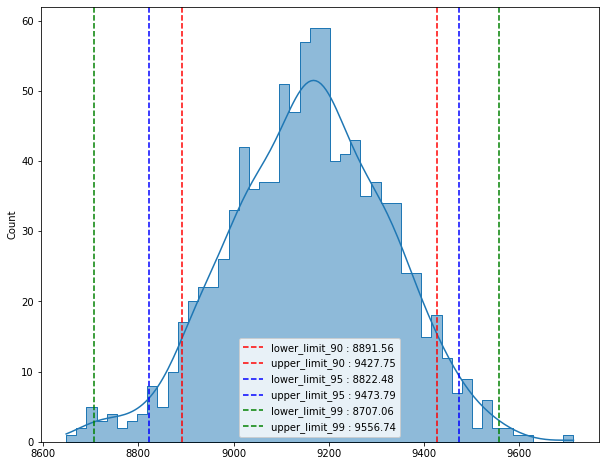

In [119]:
plt.figure(figsize=(10, 8))
sns.histplot(df_18_to_25_sample,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
lower_limit_90CI= np.percentile(df_18_to_25_sample,5)
upper_limit_90CI=np.percentile(df_18_to_25_sample,95)
plt.axvline(lower_limit_90CI, color='red', linestyle='--', label=f'lower_limit_90 : {round(lower_limit_90CI, 2)}')
plt.axvline(upper_limit_90CI, color='red', linestyle='--', label=f'upper_limit_90 : {round(upper_limit_90CI, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
lower_limit_95CI= np.percentile(df_18_to_25_sample,2.5)
upper_limit_95CI=np.percentile(df_18_to_25_sample,97.5)
plt.axvline(lower_limit_95CI, color='blue', linestyle='--', label=f'lower_limit_95 : {round(lower_limit_95CI, 2)}')
plt.axvline(upper_limit_95CI, color='blue', linestyle='--', label=f'upper_limit_95 : {round(upper_limit_95CI, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
lower_limit_99CI= np.percentile(df_18_to_25_sample,0.5)
upper_limit_99CI=np.percentile(df_18_to_25_sample,99.5)
plt.axvline(lower_limit_99CI, color='green', linestyle='--', label=f'lower_limit_99 : {round(lower_limit_99CI, 2)}')
plt.axvline(upper_limit_99CI, color='green', linestyle='--', label=f'upper_limit_99 : {round(upper_limit_99CI, 2)}')

plt.legend()
plt.show()

In [120]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 1000 of people in 26-35 yrs age group.

age_26_to_35_mean_purchases=[]
for sample_size in range(50, 1000):
    sample_mean = df_26_to_35['Purchase'].sample(sample_size).mean()
    age_26_to_35_mean_purchases.append(sample_mean)

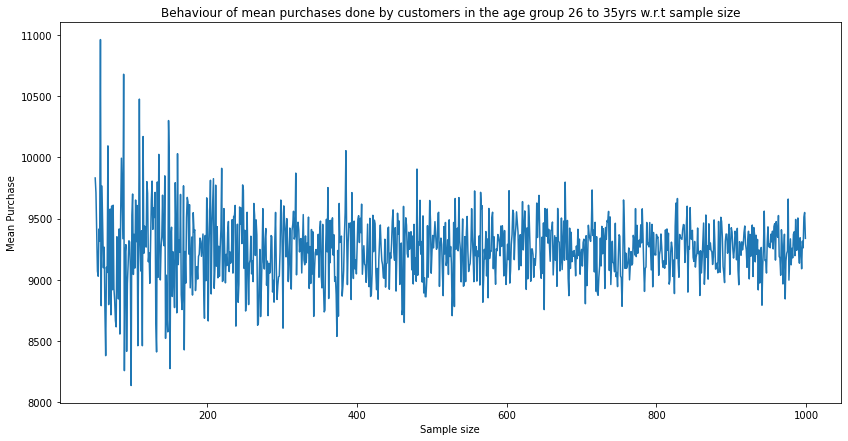

In [121]:
plt.figure(figsize=(14,7))
plt.plot(np.arange(50,1000),age_26_to_35_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Behaviour of mean purchases done by customers in the age group 26 to 35yrs w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [123]:
# Creating a sample of purchase data of people in the age group of 26 to 35 yrs.

sample_size=1000
iterations=1000
df_26_to_35_sample = [df_26_to_35.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

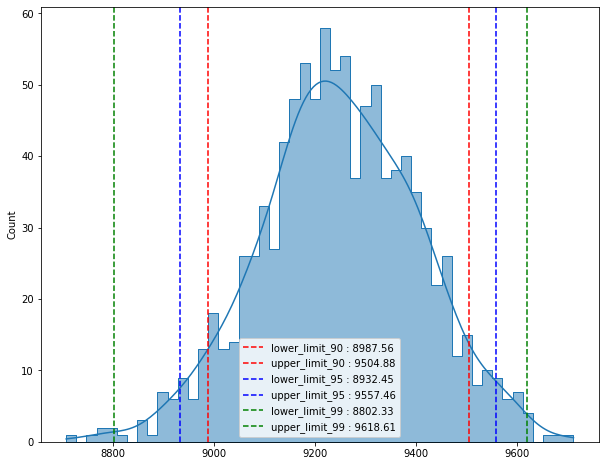

In [124]:
plt.figure(figsize=(10, 8))
sns.histplot(df_26_to_35_sample,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
lower_limit_90CI= np.percentile(df_26_to_35_sample,5)
upper_limit_90CI=np.percentile(df_26_to_35_sample,95)
plt.axvline(lower_limit_90CI, color='red', linestyle='--', label=f'lower_limit_90 : {round(lower_limit_90CI, 2)}')
plt.axvline(upper_limit_90CI, color='red', linestyle='--', label=f'upper_limit_90 : {round(upper_limit_90CI, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
lower_limit_95CI= np.percentile(df_26_to_35_sample,2.5)
upper_limit_95CI=np.percentile(df_26_to_35_sample,97.5)
plt.axvline(lower_limit_95CI, color='blue', linestyle='--', label=f'lower_limit_95 : {round(lower_limit_95CI, 2)}')
plt.axvline(upper_limit_95CI, color='blue', linestyle='--', label=f'upper_limit_95 : {round(upper_limit_95CI, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
lower_limit_99CI= np.percentile(df_26_to_35_sample,0.5)
upper_limit_99CI=np.percentile(df_26_to_35_sample,99.5)
plt.axvline(lower_limit_99CI, color='green', linestyle='--', label=f'lower_limit_99 : {round(lower_limit_99CI, 2)}')
plt.axvline(upper_limit_99CI, color='green', linestyle='--', label=f'upper_limit_99 : {round(upper_limit_99CI, 2)}')

plt.legend()
plt.show()

In [126]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 1000 of people in 36-45 yrs age group.

age_36_to_45_mean_purchases=[]
for sample_size in range(50, 1000):
    sample_mean = df_36_to_45['Purchase'].sample(sample_size).mean()
    age_36_to_45_mean_purchases.append(sample_mean)

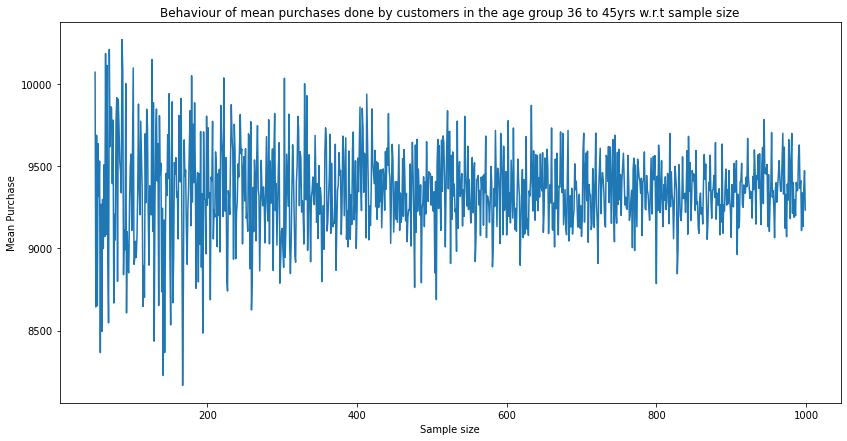

In [127]:
plt.figure(figsize=(14,7))
plt.plot(np.arange(50,1000),age_36_to_45_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Behaviour of mean purchases done by customers in the age group 36 to 45yrs w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [128]:
# Creating a sample of purchase data of people in the age group of 36 to 45 yrs.

sample_size=1000
iterations=1000
df_36_to_45_sample = [df_36_to_45.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

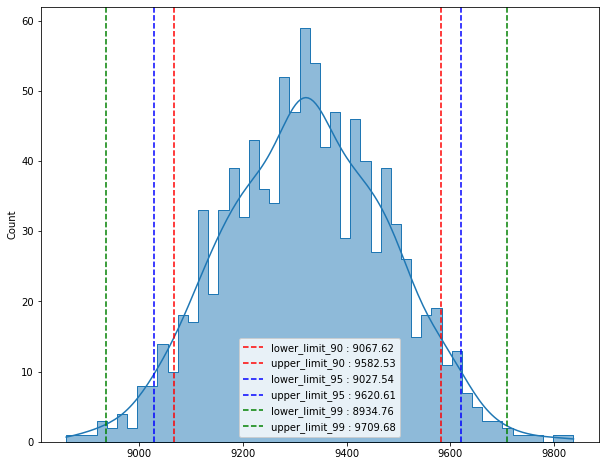

In [129]:
plt.figure(figsize=(10, 8))
sns.histplot(df_36_to_45_sample,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
lower_limit_90CI= np.percentile(df_36_to_45_sample,5)
upper_limit_90CI=np.percentile(df_36_to_45_sample,95)
plt.axvline(lower_limit_90CI, color='red', linestyle='--', label=f'lower_limit_90 : {round(lower_limit_90CI, 2)}')
plt.axvline(upper_limit_90CI, color='red', linestyle='--', label=f'upper_limit_90 : {round(upper_limit_90CI, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
lower_limit_95CI= np.percentile(df_36_to_45_sample,2.5)
upper_limit_95CI=np.percentile(df_36_to_45_sample,97.5)
plt.axvline(lower_limit_95CI, color='blue', linestyle='--', label=f'lower_limit_95 : {round(lower_limit_95CI, 2)}')
plt.axvline(upper_limit_95CI, color='blue', linestyle='--', label=f'upper_limit_95 : {round(upper_limit_95CI, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
lower_limit_99CI= np.percentile(df_36_to_45_sample,0.5)
upper_limit_99CI=np.percentile(df_36_to_45_sample,99.5)
plt.axvline(lower_limit_99CI, color='green', linestyle='--', label=f'lower_limit_99 : {round(lower_limit_99CI, 2)}')
plt.axvline(upper_limit_99CI, color='green', linestyle='--', label=f'upper_limit_99 : {round(upper_limit_99CI, 2)}')

plt.legend()
plt.show()

In [130]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 1000 of people in 46-50 yrs age group.

age_46_to_50_mean_purchases=[]
for sample_size in range(50, 1000):
    sample_mean = df_46_to_50['Purchase'].sample(sample_size).mean()
    age_46_to_50_mean_purchases.append(sample_mean)

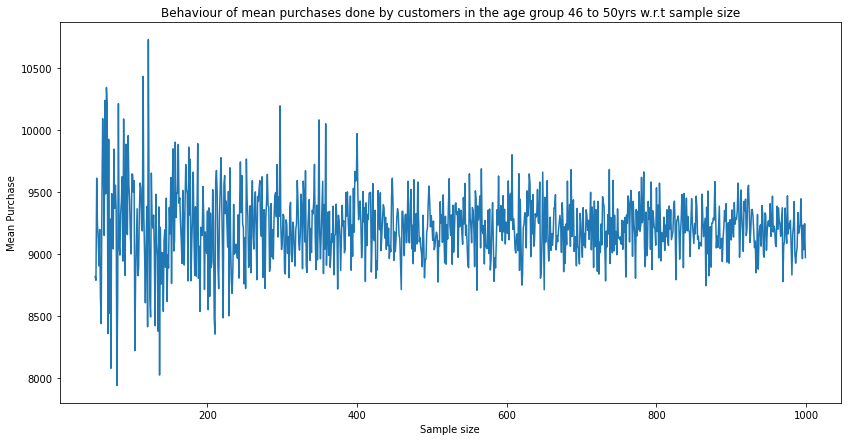

In [131]:
plt.figure(figsize=(14,7))
plt.plot(np.arange(50,1000),age_46_to_50_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Behaviour of mean purchases done by customers in the age group 46 to 50yrs w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [132]:
# Creating a sample of purchase data of people in the age group of 46 to 50 yrs.

sample_size=1000
iterations=1000
df_46_to_50_sample = [df_46_to_50.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

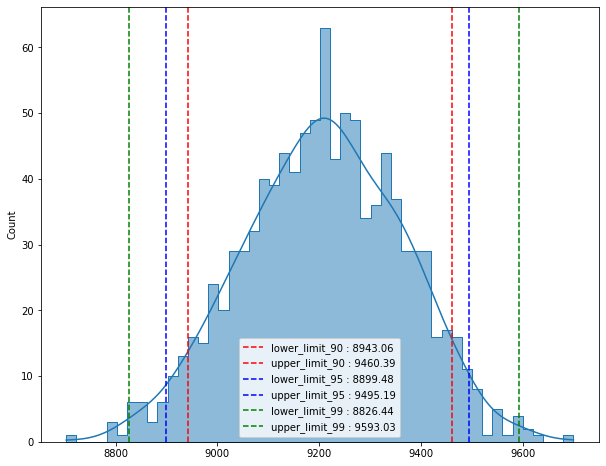

In [133]:
plt.figure(figsize=(10, 8))
sns.histplot(df_46_to_50_sample,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
lower_limit_90CI= np.percentile(df_46_to_50_sample,5)
upper_limit_90CI=np.percentile(df_46_to_50_sample,95)
plt.axvline(lower_limit_90CI, color='red', linestyle='--', label=f'lower_limit_90 : {round(lower_limit_90CI, 2)}')
plt.axvline(upper_limit_90CI, color='red', linestyle='--', label=f'upper_limit_90 : {round(upper_limit_90CI, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
lower_limit_95CI= np.percentile(df_46_to_50_sample,2.5)
upper_limit_95CI=np.percentile(df_46_to_50_sample,97.5)
plt.axvline(lower_limit_95CI, color='blue', linestyle='--', label=f'lower_limit_95 : {round(lower_limit_95CI, 2)}')
plt.axvline(upper_limit_95CI, color='blue', linestyle='--', label=f'upper_limit_95 : {round(upper_limit_95CI, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
lower_limit_99CI= np.percentile(df_46_to_50_sample,0.5)
upper_limit_99CI=np.percentile(df_46_to_50_sample,99.5)
plt.axvline(lower_limit_99CI, color='green', linestyle='--', label=f'lower_limit_99 : {round(lower_limit_99CI, 2)}')
plt.axvline(upper_limit_99CI, color='green', linestyle='--', label=f'upper_limit_99 : {round(upper_limit_99CI, 2)}')

plt.legend()
plt.show()

In [134]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 1000 of people in 51-55 yrs age group.

age_51_to_55_mean_purchases=[]
for sample_size in range(50, 1000):
    sample_mean = df_51_to_55['Purchase'].sample(sample_size).mean()
    age_51_to_55_mean_purchases.append(sample_mean)

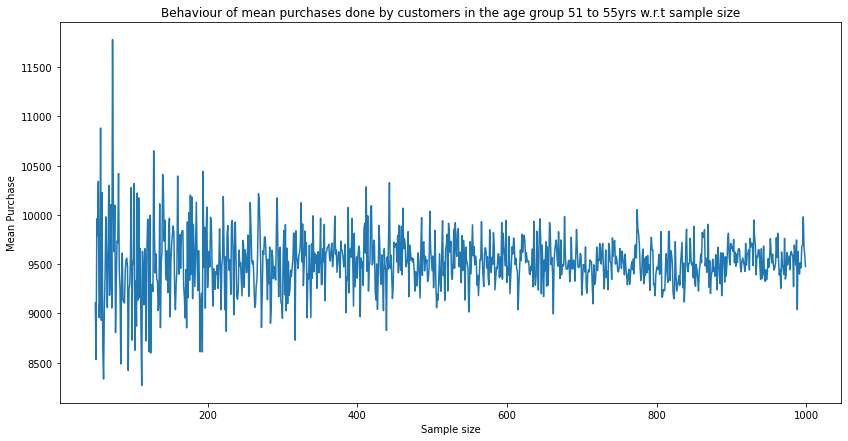

In [135]:
plt.figure(figsize=(14,7))
plt.plot(np.arange(50,1000),age_51_to_55_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Behaviour of mean purchases done by customers in the age group 51 to 55yrs w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [136]:
# Creating a sample of purchase data of people in the age group of 51 to 55 yrs.

sample_size=1000
iterations=1000
df_51_to_55_sample = [df_51_to_55.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

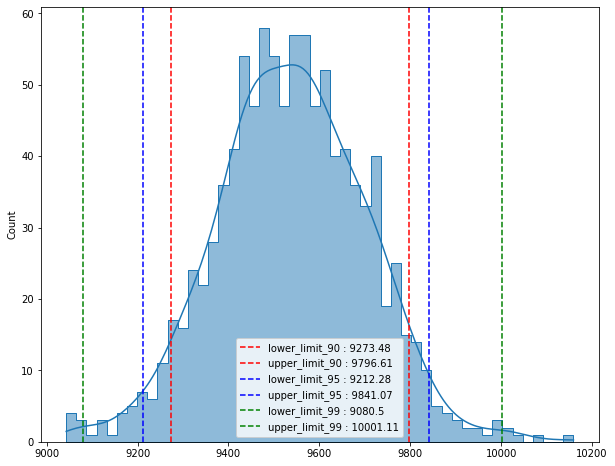

In [137]:
plt.figure(figsize=(10, 8))
sns.histplot(df_51_to_55_sample,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
lower_limit_90CI= np.percentile(df_51_to_55_sample,5)
upper_limit_90CI=np.percentile(df_51_to_55_sample,95)
plt.axvline(lower_limit_90CI, color='red', linestyle='--', label=f'lower_limit_90 : {round(lower_limit_90CI, 2)}')
plt.axvline(upper_limit_90CI, color='red', linestyle='--', label=f'upper_limit_90 : {round(upper_limit_90CI, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
lower_limit_95CI= np.percentile(df_51_to_55_sample,2.5)
upper_limit_95CI=np.percentile(df_51_to_55_sample,97.5)
plt.axvline(lower_limit_95CI, color='blue', linestyle='--', label=f'lower_limit_95 : {round(lower_limit_95CI, 2)}')
plt.axvline(upper_limit_95CI, color='blue', linestyle='--', label=f'upper_limit_95 : {round(upper_limit_95CI, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
lower_limit_99CI= np.percentile(df_51_to_55_sample,0.5)
upper_limit_99CI=np.percentile(df_51_to_55_sample,99.5)
plt.axvline(lower_limit_99CI, color='green', linestyle='--', label=f'lower_limit_99 : {round(lower_limit_99CI, 2)}')
plt.axvline(upper_limit_99CI, color='green', linestyle='--', label=f'upper_limit_99 : {round(upper_limit_99CI, 2)}')

plt.legend()
plt.show()

In [138]:
# Creating a list of mean purchase values at different sample sizes ranging from 50 to 1000 for people of 55+ yrs age.

age_above_55_mean_purchases=[]
for sample_size in range(50, 1000):
    sample_mean = df_above_55['Purchase'].sample(sample_size).mean()
    age_above_55_mean_purchases.append(sample_mean)

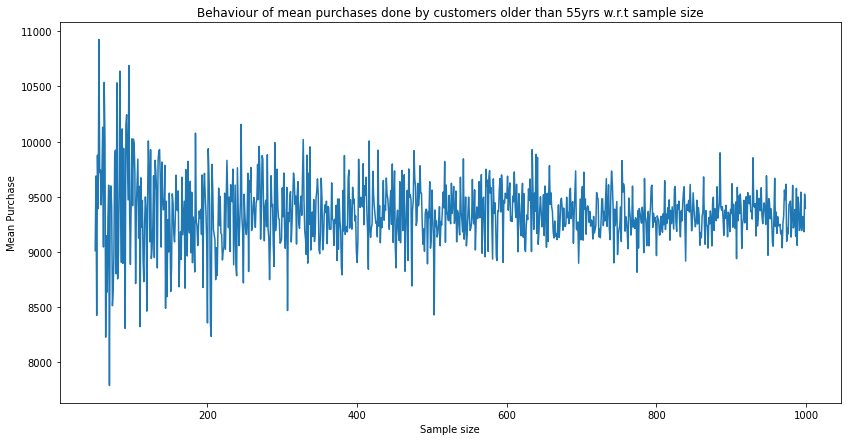

In [139]:
plt.figure(figsize=(14,7))
plt.plot(np.arange(50,1000),age_above_55_mean_purchases) #starting the plot at 50 on the x-axis as our values starts from sample size of 50
plt.title("Behaviour of mean purchases done by customers older than 55yrs w.r.t sample size")
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase')
plt.show()

In [140]:
# Creating a sample of purchase data of people in the age group of 51 to 55 yrs.

sample_size=1000
iterations=1000
df_above_55_sample = [df_above_55.sample(sample_size, replace = True)["Purchase"].mean() for i in range(iterations)]

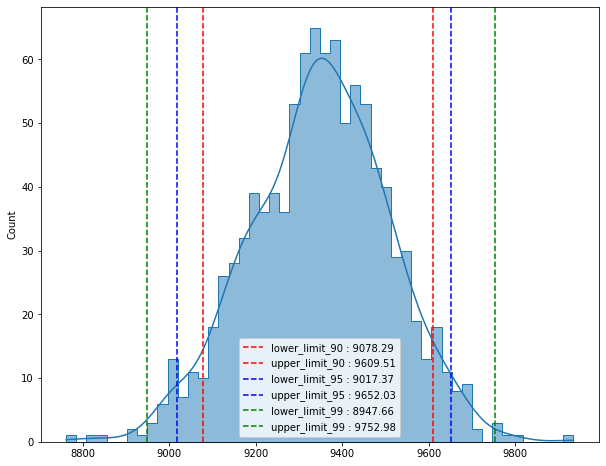

In [141]:
plt.figure(figsize=(10, 8))
sns.histplot(df_above_55_sample,kde=True,fill=True,bins=50,element='step')

#Calculating the upper and lower limits for a 90% Confidence Interval.
lower_limit_90CI= np.percentile(df_above_55_sample,5)
upper_limit_90CI=np.percentile(df_above_55_sample,95)
plt.axvline(lower_limit_90CI, color='red', linestyle='--', label=f'lower_limit_90 : {round(lower_limit_90CI, 2)}')
plt.axvline(upper_limit_90CI, color='red', linestyle='--', label=f'upper_limit_90 : {round(upper_limit_90CI, 2)}')

#Calculating the upper and lower limits for a 95% Confidence Interval.
lower_limit_95CI= np.percentile(df_above_55_sample,2.5)
upper_limit_95CI=np.percentile(df_above_55_sample,97.5)
plt.axvline(lower_limit_95CI, color='blue', linestyle='--', label=f'lower_limit_95 : {round(lower_limit_95CI, 2)}')
plt.axvline(upper_limit_95CI, color='blue', linestyle='--', label=f'upper_limit_95 : {round(upper_limit_95CI, 2)}')

#Calculating the upper and lower limits for a 99% Confidence Interval.
lower_limit_99CI= np.percentile(df_above_55_sample,0.5)
upper_limit_99CI=np.percentile(df_above_55_sample,99.5)
plt.axvline(lower_limit_99CI, color='green', linestyle='--', label=f'lower_limit_99 : {round(lower_limit_99CI, 2)}')
plt.axvline(upper_limit_99CI, color='green', linestyle='--', label=f'upper_limit_99 : {round(upper_limit_99CI, 2)}')

plt.legend()
plt.show()

# Recommendations

- As majority of transactions are made by males, it can be beneficial to do targeted marketing campaigns to attract male customers.
- It can also be fruitful to tailor marketing stratagies to female customers by providing promotional offers, discounts on specific product categories etc., to attract more femal customers and increase their purchase value.
- As close to 80% of the purchases and revenue are made by customers between the ages 18-45 yrs, offers or discounts can be aligned with them to maximize revenue.
- The product categories 1,5,8,6 and 2 contribute close to 85% of the revenue. So providing more variants / products in this category can be helpful in increasing the revenue. 
- Analyze the under performing product categories and do RCAs for their performance to decide whether they can be removed from the inventory to free up space for better performing products.
- More than 50% of the purchases are made by just top 5 occupations generating more than 50% of revenue from customers of those 5 occupations.
- Offer more targeted discounts and promotions during holidays, seasonal events etc. to attract newer customers.
- Conduct and in depth analysis why certain cities are unable to generete good revenue even when their user share is more. And carefully design marketing campaigns to improve where lacking.